# The Duffing oscillator

The second-order differential equation of the system is given by
$$
m\ddot{x} (t) = F[x(t), \dot{x}(t), t], F= -\gamma \dot{x} + 2 a x - 4 b x^3 + F_0 \cos(\omega_0 t).
$$

The first force term is a velocity dependent term that can be interpreted as friction. The next two terms are the force a particle feels when moving in a double potential well, 
\begin{equation}
V(x) = b x^4 - a x^2. 
\end{equation}
The last term is due to an external driving force.


The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time: $x$ is proportional to the rate of convection, $y$ to the horizontal temperature variation, and $z$ to the vertical temperature variation. The constants $\sigma, \rho,$ and $\beta$ are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself. The Lorenz equations also arise in simplified models for lasers,dynamos, thermosyphons, brushless DC motors, electric circuits,chemical reactionsand forward osmosis.

<IPython.core.display.Javascript object>


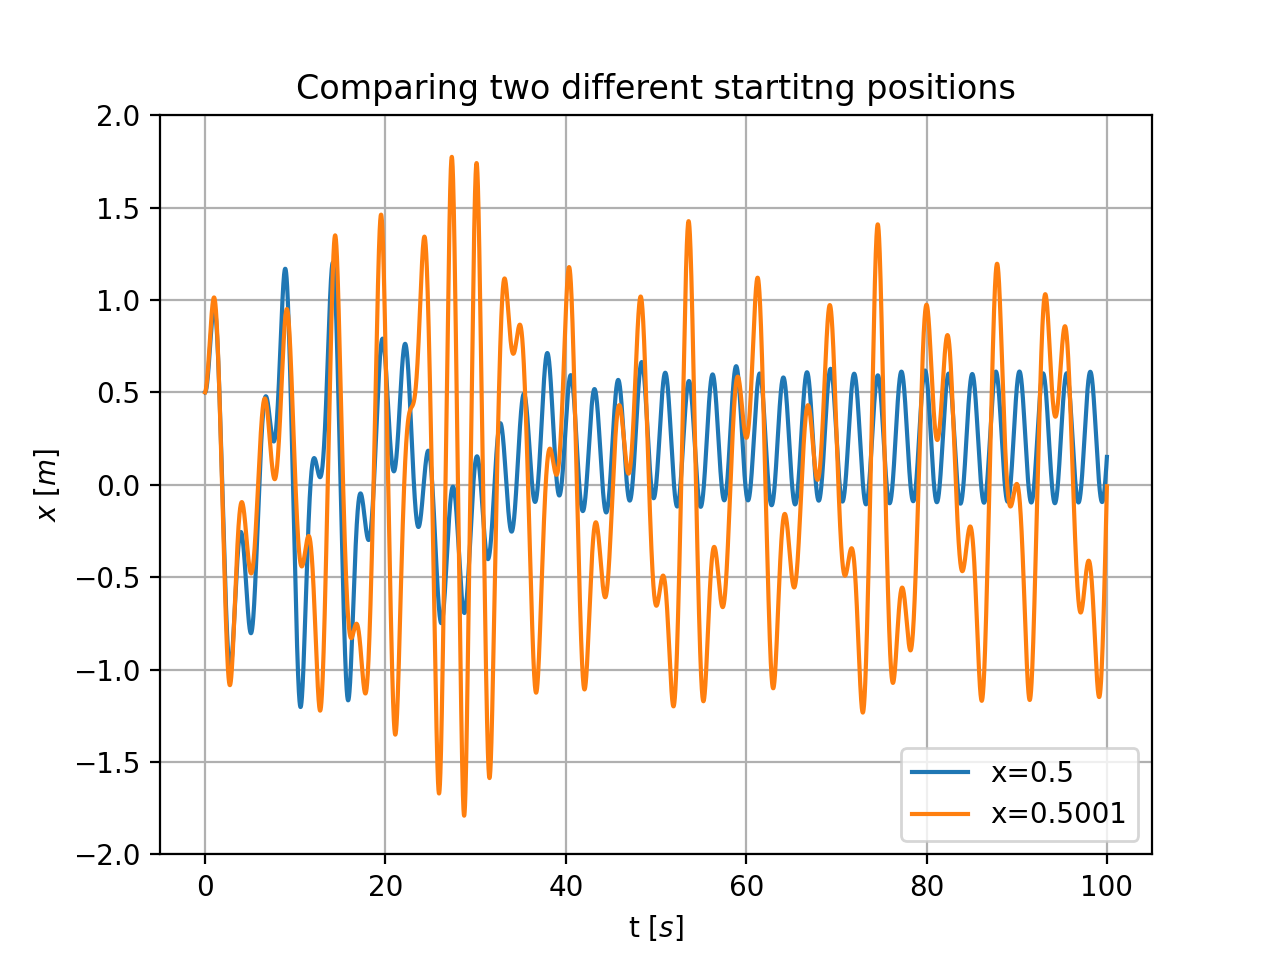

In [119]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

def duffing(X, t, gamma, a, b, F0, omegaD):
    """
    Given:
       X                : a 2 dimensional state (x and v) that gives the initial conditions
       t                : time 
       gamma, a, b, F0      : parameters given
    Returns:
       the values of the velocity and acceleration
    """
    x, dotx = X
    ddotx = -gamma*dotx + 2.0*a*x - 4.0*b*x**3 + F0* np.cos(omegaD*t) 
    return [dotx, ddotx]

h      = 0.01                    # the step size
t      = np.arange(0,100+h, h)   # the numerical grid, in the range t =[0, 100]
x      = np.zeros(len(t))        # create the x grid, the size of t, all values are zero
omegaD = 2.4
F0     = 2.0
gamma = 0.1
a = 0.25
b = 0.5

fig = plt.figure()
plt.grid()

X0 = [0.5, 0.]
X = integrate.odeint(duffing, X0, t, args = (gamma, a, b, F0, omegaD))
line0 = plt.plot(t, X[:,0], label = "x=0.5")

X1 = [0.5001, 0.1]
X = integrate.odeint(duffing, X1, t, args = (gamma, a, b, F0, omegaD))
line1 =  plt.plot(t, X[:,0], label = "x=0.5001")

plt.title("Comparing two different startitng positions")
plt.ylim(-2, 2)
plt.xlabel("t [$s$]")
plt.ylabel("$x$ [$m$]")
plt.legend(loc='lower right')

plt.show();


<IPython.core.display.Javascript object>


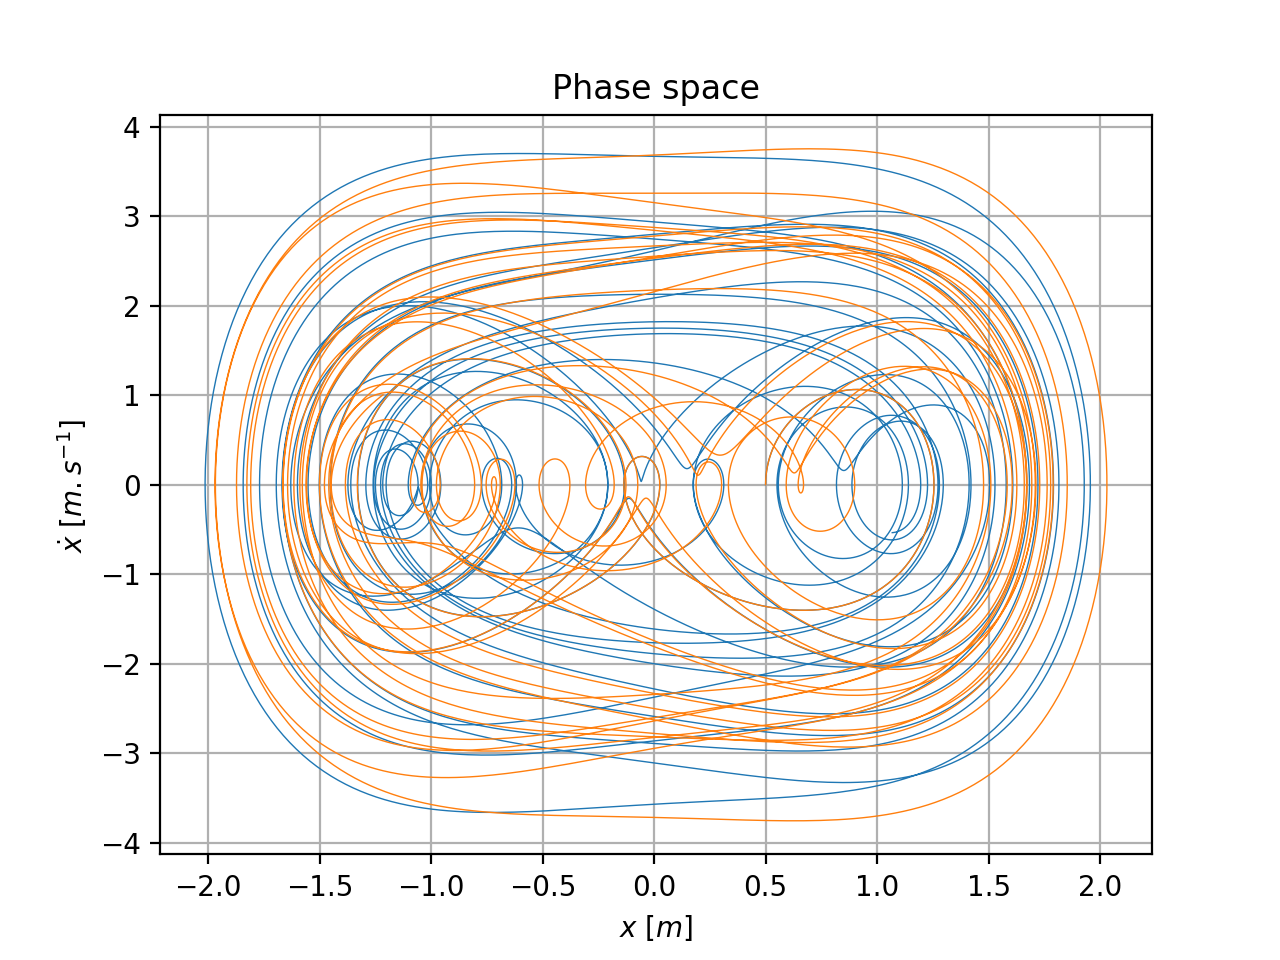

In [120]:
omegaD = 2.5
F0     = 2.0
gamma = 0.1
a = 0.85
b = 0.5

plt.figure()
plt.grid()
plt.title("Phase space")


X0 = [0.5, 0.0]
X = integrate.odeint(duffing, X0, t, args = (gamma, a, b, F0, omegaD))
line0 = plt.plot(X[:,0], X[:,1], lw = 0.5, label = "x=0.5")

X1 = [0.5001, 0.]
X = integrate.odeint(duffing, X1, t, args = (gamma, a, b, F0, omegaD))
line1 =  plt.plot(X[:,0], X[:,1], lw = 0.5, label = "x=0.5001")

plt.xlabel("$x$ [$m$]")
plt.ylabel("$\dot{x}$ [$m.s^{-1}$] ")
plt.show();